##**☕ Importando as bibliotecas**

In [ ]:
import sys as sys 
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib as mtpl
import pandas as pd
import sklearn as sk


###**☕ Importando Módulos, funções e objetos**

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score



##**☕ Carga do conjunto de dados**

In [ ]:
df = pd.read_csv('Sementes.csv', sep = ';', encoding = 'utf8')

df

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,01/01/2013,NaN,9.5,NaN,38.00
1,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,05/01/2013,NaN,6.0,NaN,24.00
2,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,10/01/2013,NaN,9.5,NaN,38.00
3,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,03/02/2013,NaN,4.5,NaN,15.75
4,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,27/01/2013,NaN,1.6,NaN,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...
280627,2019/2020,Glycine max (L.) Merr.,S2,5855RSF IPRO,Ubiretama,RS,Aprovado,01/12/2019,11/03/2020,10.0,34.43,30.00
280628,2019/2020,Glycine max (L.) Merr.,S1,BS2606IPRO,Arapoti,PR,Homologado,29/11/2019,NaN,100.0,NaN,150.00
280629,2019/2020,Glycine max (L.) Merr.,C1,SYN1785 IPRO,Buritis,MG,Homologado,07/12/2019,NaN,100.0,NaN,280.00
280630,2019/2020,Glycine max (L.) Merr.,S1,NS6700IPRO,São José da Boa Vista,PR,Homologado,28/11/2019,NaN,39.0,NaN,58.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280632 entries, 0 to 280631
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Safra              280632 non-null  object 
 1   Especie            280632 non-null  object 
 2   Categoria          280630 non-null  object 
 3   Cultivar           280632 non-null  object 
 4   Municipio          280628 non-null  object 
 5   UF                 280632 non-null  object 
 6   Status             280632 non-null  object 
 7   Data do Plantio    280632 non-null  object 
 8   Data de Colheita   50502 non-null   object 
 9   Area               280632 non-null  float64
 10  Producao bruta     50502 non-null   float64
 11  Producao estimada  280632 non-null  float64
dtypes: float64(3), object(9)
memory usage: 25.7+ MB


##**☕ Análise exploratória do conjunto de dados**


In [ ]:
#Dimensão (linhas e colunas)
print(df.shape)

(280632, 12)


In [ ]:
#Resumo estatístico
display(df.describe())

,Area,Producao bruta,Producao estimada
count,280632.000000,50502.000000,280632.000000
mean,69.564032,6339.364021,282.936253
std,93.835624,46866.725631,4506.402197
min,0.000000,0.000000,0.000000
25%,17.000000,32.800000,48.000000
50%,43.000000,103.943500,122.400000
75%,92.000000,258.000000,270.000000
max,4351.000000,993172.000000,759600.000000


In [ ]:
#Eliminar campos nulos e colunas desnecessarias 
df = df.dropna()
#df = df.drop(['UF','Municipio','Status','Cultivar'], axis = 1)


In [ ]:
df['Categoria'] = df['Categoria'].map({ 'Básica':0,
                     'Genética':1,
                     'C1': 2,
                     'C2': 3,
                     'S1': 4,
                     'S2': 5
})

df.head(20)

<ipython-input-48-3eb387a55bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Categoria'] = df['Categoria'].map({ 'Básica':0,


,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
49,2013/2013,Zea mays L.,2,P4285H,Paraúna,GO,Aprovado,16/02/2013,10/06/2013,44.0,409.06,140.8
62,2013/2013,Zea mays L.,2,P4285YH,Paraúna,GO,Aprovado,17/02/2013,19/06/2013,37.0,279.16,118.4
69,2013/2013,Zea mays L.,2,P3646,Morrinhos,GO,Aprovado,28/02/2013,29/06/2013,23.5,201.67,105.0
70,2013/2013,Zea mays L.,2,P3161H,Paraúna,GO,Aprovado,15/02/2013,05/06/2013,28.0,167.71,72.8
94,2013/2013,Zea mays L.,2,BG7061H,Caiapônia,GO,Aprovado,14/02/2013,24/06/2013,87.0,848.27,279.1
95,2013/2013,Zea mays L.,2,P4285YH,São João da Paraúna,GO,Aprovado,20/02/2013,25/06/2013,55.0,571.04,176.0
96,2013/2013,Zea mays L.,2,P4285YH,Paraúna,GO,Aprovado,20/02/2013,23/06/2013,51.0,364.22,163.2
97,2013/2013,Zea mays L.,2,BG7061H,Morrinhos,GO,Aprovado,21/02/2013,17/06/2013,27.0,248.40,86.6
98,2013/2013,Zea mays L.,2,BG7061H,Morrinhos,GO,Aprovado,20/02/2013,15/06/2013,22.0,182.75,70.6
101,2013/2013,Zea mays L.,2,P3161H,Paraúna,GO,Aprovado,18/02/2013,04/06/2013,52.0,344.19,135.3


In [ ]:
#Agrupamento das espécies (Distribuição de classe)
display(df.groupby('Especie').size())


Especie
Abelmoschus esculentus (L.) Moench = Hibiscus esculentus L.                         87
Acrocomia aculeata (Jacq.) Lodd. ex Mart.                                            1
Allium cepa L.                                                                     376
Allium porrum L.                                                                     1
Andropogon gayanus Kunth                                                             6
                                                                                  ... 
Vicia villosa Roth                                                                   4
Vigna unguiculata (L.) Walp.                                                        40
Zea mays L.                                                                       4323
Zea mays L. subsp. mexicana (Schrad.) H. H. Iltis = Euchlaena mexicana Schrad.       1
Zea mays L. var. saccharina                                                         28
Length: 109, dtype: int64

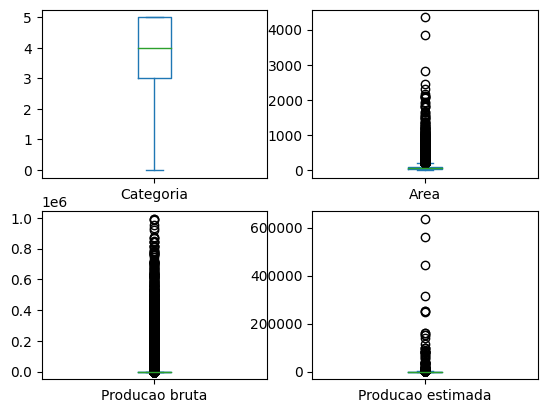

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

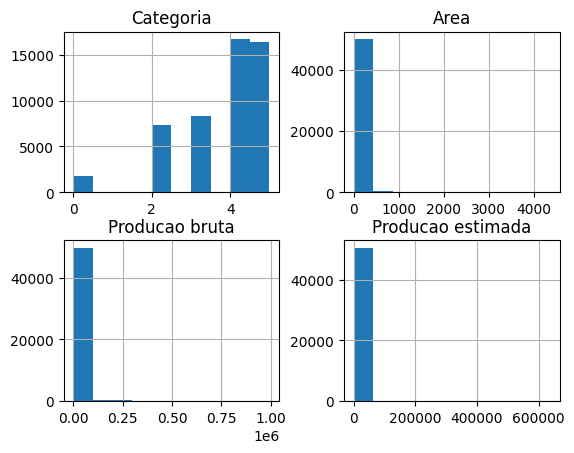

In [ ]:
df.hist()
plt.show()

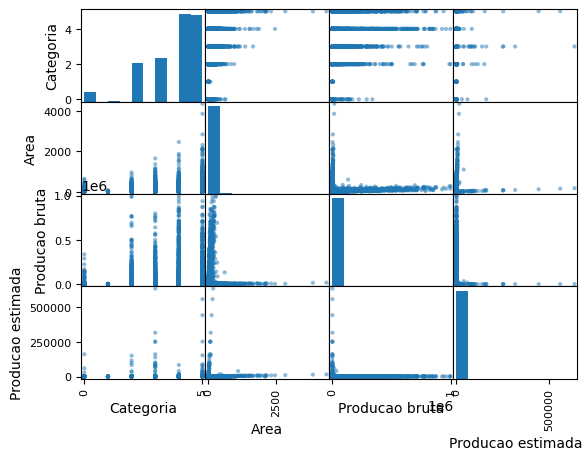

In [ ]:
#Identificação de relação das variaveis de entrada
scatter_matrix(df)
plt.show()

In [ ]:
#Agrupando os dados por UF e Espécie e calculando a média da produção anual
grouped = df.groupby(['UF', 'Especie']).agg({'Producao estimada': 'mean'})

#Exibindo o resultado
print(grouped)

                                                       Producao estimada
UF Especie                                                              
AL Glycine max (L.) Merr.                                      39.320000
   Vigna unguiculata (L.) Walp.                                32.500000
BA Abelmoschus esculentus (L.) Moench = Hibiscus e...          17.500000
   Allium cepa L.                                              10.066667
   Carica papaya L.                                             0.433333
...                                                                  ...
SP Zea mays L.                                                208.940115
TO Andropogon gayanus Kunth                                   100.000000
   Glycine max (L.) Merr.                                    1629.852085
   Oryza sativa L.                                            324.633750
   Zea mays L.                                                120.960000

[312 rows x 1 columns]


##**Tratamento dos dados**

In [ ]:
df.dropna(axis = 0 ) # excluir linhas com pelo menos um valor nulo
df = df.drop('Data do Plantio', axis =1)
df = df.drop('Data de Colheita', axis =1)


In [ ]:

#transformar cada categoria em um número inteiro
df['Safra'] = df['Safra'].astype('category').cat.codes 
df['Especie'] = df['Especie'].astype('category').cat.codes 
df['Categoria'] = df['Categoria'].astype('category').cat.codes 
df['Municipio'] = df['Municipio'].astype('category').cat.codes 
df['UF'] = df['UF'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes
df['Cultivar'] = df['Cultivar'].astype('category').cat.codes

df.head()

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Area,Producao bruta,Producao estimada
49,0,106,2,1397,696,4,0,44.0,409.06,140.8
62,0,106,2,1400,696,4,0,37.0,279.16,118.4
69,0,106,2,1372,616,4,0,23.5,201.67,105.0
70,0,106,2,1349,696,4,0,28.0,167.71,72.8
94,0,106,2,335,149,4,0,87.0,848.27,279.1


In [ ]:
df['Producao bruta'] = df['Producao bruta'].fillna(0)

##**☕Treino e teste**

In [ ]:
# separa as features (X) e target (y)
X = df.drop(['Municipio', 'UF'], axis=1)
y = df['Especie']

# divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cria o modelo de regressão linear
model = LinearRegression()

# avalia o desempenho do modelo usando validação cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, error_score ='raise')

# exibe a média das pontuações
print('Pontuações:', scores)
print('Média:', scores.mean())

# ajusta o modelo aos dados de treinamento
model.fit(X_train, y_train)

# avalia o modelo nos dados de teste
score = model.score(X_test, y_test)
print('Acurácia:', score)


Pontuações: [1. 1. 1. 1. 1.]
Média: 1.0
Acurácia: 1.0


In [ ]:
# faz previsões com novos dados
novos_dados = pd.read_csv('sigefcamposproducaodesementes.csv', sep =';', encoding ='utf-8')
previsoes = model.predict(novos_dados)
print('Previsões:', previsoes)